# Risk Tolerance

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [42]:
# Importing Models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [43]:
# Importing Training pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [2]:
from config import CONFIG

In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
dataset = pd.read_excel(CONFIG.data / "SCFP2009panel.xlsx")

In [11]:
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.134198,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.456494,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.228354,47,3,12,2,1,0,2,...,-50.000000,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.394266,47,3,12,2,1,0,2,...,-33.333333,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.722907,47,3,12,2,1,0,2,...,-38.596491,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,232.690767,57


In [8]:
dataset.shape

(19285, 515)

### True risk tolerance formula:

1. Compute risky assets and risk-free assets:

    a. Risky assets: Investments in mutual funds, stocks, and bonds

    b. Risk-free assets: Checking and savings balances, certificates of deposit, and other cash balances and equivalents

2. Take the ratio of risky assets to total assets -> risk tolerance.

3. Identify intelligen investors

In [23]:
# Compute the risky assets and risk-free assets for 2007

dataset["RiskFree07"] = dataset["LIQ07"] + dataset["CDS07"] + dataset["SAVBND07"] + dataset["CASHLI07"]

dataset["Risky07"] = dataset["NMMF07"] + dataset["STOCKS07"] + dataset["BOND07"]

# Compute the risky assets and risk-free assets for 2009

dataset["RiskFree09"] = dataset["LIQ09"] + dataset["CDS09"] + dataset["SAVBND09"] + dataset["CASHLI09"]

dataset["Risky09"] = dataset["NMMF09"] + dataset["STOCKS09"] + dataset["BOND09"]

# COmpute the risk tolerance for 2007
dataset["RT07"] = dataset["Risky07"] / (dataset["Risky07"] + dataset["RiskFree07"])

# Average stock index for normalizing the risky assets in 2009
Average_SP500_2007 = 1478
Average_SP500_2009 = 948

# Compute the risk tolerance for 2009
dataset["RT09"] = dataset["Risky09"] / (dataset["Risky09"] + dataset["RiskFree09"]) * (Average_SP500_2009 / Average_SP500_2007)

In [24]:
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RiskFree09,Risky09,RT07,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,16000,17000,0.0,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,19000,18000,0.0,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,13000,12000,0.0,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,25000,13000,0.0,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,17000,12000,0.0,0.265410


In [26]:
# percentage change in risk tolerance between 2007 and 2009

dataset["PercentageChange"] = np.abs(dataset["RT09"] / dataset["RT07"] - 1)

In [28]:
dataset = dataset.dropna(axis=0)
dataset = dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]

In [29]:
# Risk tolerance behavior of individuals in 2007 vs. 2009

/home/tnguyen2921/miniconda3/envs/fin-ml/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RT07'>

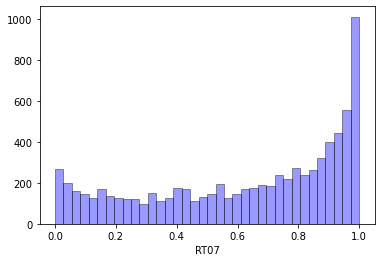

In [31]:
sns.distplot(dataset["RT07"], hist=True, kde=False, bins=int(180/5), color="blue",
hist_kws={"edgecolor":"black"})

A majority of individuals had risk tolerance close to 1 for 2007. This means more people had risky assets

<AxesSubplot:xlabel='RT09'>

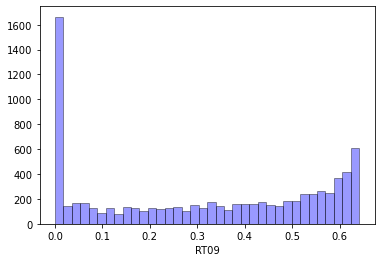

In [32]:
sns.distplot(dataset["RT09"], hist=True, kde=False, bins=int(180/5), color="blue",
hist_kws={"edgecolor":"black"})

Risky-assets take a majority in 2009, however. This indicates the behavioral trend after the 2008 global crisis.

In [33]:
dataset3 = dataset[dataset["PercentageChange"] <= .1]

In [34]:
dataset3["TrueRiskTolerance"] = (dataset3["RT07"] + dataset3["RT09"]) / 2

<ipython-input-34-26bc28a7d7bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3["TrueRiskTolerance"] = (dataset3["RT07"] + dataset3["RT09"]) / 2


In [35]:
dataset3.drop(labels=["RT07", "RT09"], axis=1, inplace=True)
dataset3.drop(labels=["PercentageChange"], axis=1, inplace=True)

/home/tnguyen2921/miniconda3/envs/fin-ml/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


We'll build a machine learning models to predict true risk tolerance based on demographic, financial, and behavioral attributes such as age, current income, net worth, and willingness to take risk.

In [36]:
keep_list2 = ["AGE07", "EDCL07", "MARRIED07", "KIDS07", "OCCAT107", "INCOME07", "RISK07", "NETWORTH07", "TrueRiskTolerance"]
drop_list2 = [col for col in dataset3.columns if col not in keep_list2]
dataset3.drop(labels=drop_list2, axis=1, inplace=True)

/home/tnguyen2921/miniconda3/envs/fin-ml/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:title={'center':'Correlation Matrix'}>

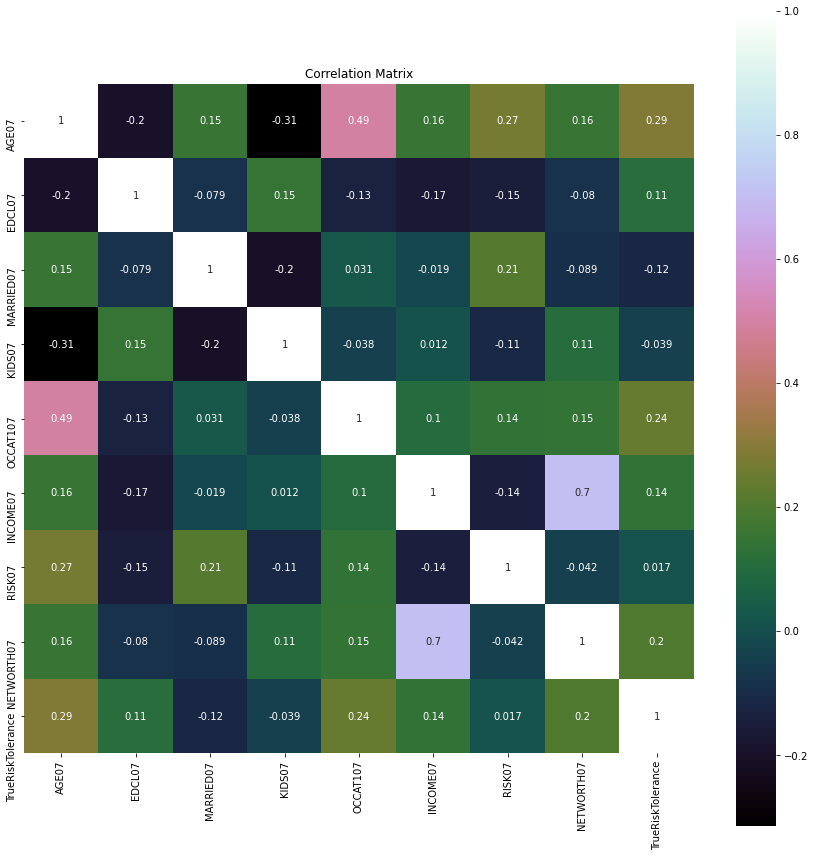

In [38]:
# heat map
correlation = dataset3.corr()
plt.figure(figsize=(15, 15))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix")

### Model Training

In [41]:
Y = dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != "TrueRiskTolerance"]
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [44]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Ensemble Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [50]:
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
# scoring = 'r2'

In [51]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.028507 (0.007371)
LASSO: 0.030630 (0.006896)
EN: 0.030452 (0.006944)
KNN: 0.017840 (0.003428)
CART: 0.014189 (0.007687)
SVR: 0.028220 (0.007745)
ABR: 0.018303 (0.003805)
GBR: 0.011886 (0.004307)
RFR: 0.009468 (0.003843)
ETR: 0.009262 (0.004030)


### Algorithm Comparison

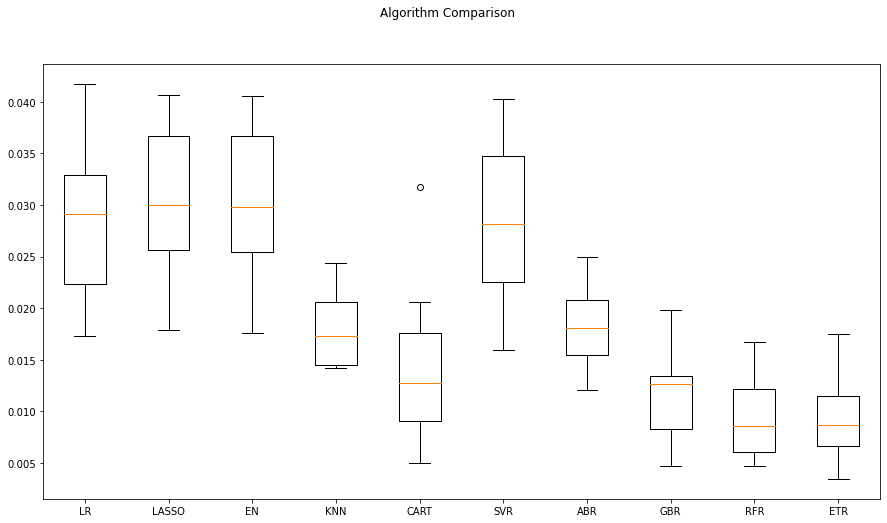

In [52]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

Random Forest is the best model with lowest errors and smallest variances

In [59]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="r2", \
  cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.707199 using {'n_estimators': 400}


In [60]:
# Finalize the model
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50)

In [61]:
from sklearn.metrics import r2_score
train_preds = model.predict(X_train)
print(r2_score(Y_train, train_preds))

0.9594234506481977


In [62]:
test_preds = model.predict(X_validation)
print(f"MSE: {mean_squared_error(Y_validation, test_preds):.3f}")
print(f"R2: {r2_score(Y_validation, test_preds):.3f}")


MSE: 0.007
R2: 0.778


In [64]:
import pickle
finalized_model = "ETTrees.sav"
pickle.dump(model, open(str(CONFIG.models / finalized_model), "wb"))

In [66]:
# sanity check
loaded_model = pickle.load(open(str(CONFIG.models / finalized_model), "rb"))
result = loaded_model.score(X_validation, Y_validation)

In [67]:
result

0.777646888474739